In [1]:
## Importing needed packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  # We use fits to open the actual data file

from astropy.utils import data

from astropy.wcs import WCS
from astropy import wcs
import sys
from astropy.visualization import make_lupton_rgb
from sklearn import preprocessing #only works for dimensions <=2

#For plotting Gaussian
from scipy.optimize import curve_fit
from astropy import modeling
from scipy.stats import norm
import math
import seaborn as sns
from scipy.signal import find_peaks
import scipy.stats as stats
import scipy.stats
from scipy import ndimage

In [2]:
#Fitting a Gaussian

location = "/Users/RuheeJanmohamed/Desktop/Data/co_zero_south.fits"

hdul = fits.open(location)

hdu_zero_south = hdul[0]

co_zero_south = hdu_zero_south.data

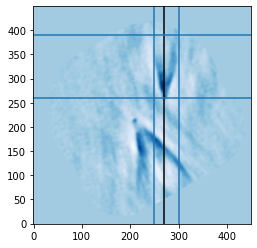

In [3]:
im_rot = ndimage.rotate(co_zero_south, angle=-30,reshape=False)
plt.imshow(im_rot,cmap='Blues',origin='lower')

plt.axvline(250) 
plt.axvline(270,c='k') #middle
plt.axvline(300) 
plt.axhline(260) #bottom
plt.axhline(390) #top

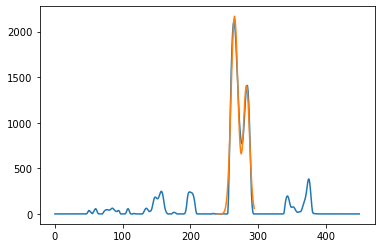

In [4]:
#Creating single cut

cut = im_rot[300:310,:]
cut[cut<0]=0
avg_cut = np.mean(cut,axis=0)

plt.plot(range(450),avg_cut)


#Defining Linear Fit
def Line_Fit(x,m,b):
    f = x*m +b
    return f

#Defining Double Gaussian

def Double_Gauss(x,amp_1,mean_1,sigma_1,amp_2,mean_2,sigma_2):
    f = (amp_1 * np.exp(-(x - mean_1)**2/(2*sigma_1**2))+ amp_2 * np.exp(-(x-mean_2)**2/(2*sigma_2**2)))
    return f

xdata = np.arange(240,295)
ydata = avg_cut[240:295]


p0 = (np.max(ydata),xdata[np.argmax(ydata)],5,np.max(ydata),xdata[np.argmax(ydata)]+10,5)

p_opt,p_cov = curve_fit(Double_Gauss,xdata,ydata,p0)
plt.plot(xdata,Double_Gauss(xdata,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5]))
# print(p_opt)
# print((avg_cut))




In [5]:
# ycut_list=[(260+(i*5),260+((i+1)*5)) for i in range(26)]

ycut_list = [(390-((i+1)*5),390-(i*5)) for i in range(26)]
print(ycut_list)


[(385, 390), (380, 385), (375, 380), (370, 375), (365, 370), (360, 365), (355, 360), (350, 355), (345, 350), (340, 345), (335, 340), (330, 335), (325, 330), (320, 325), (315, 320), (310, 315), (305, 310), (300, 305), (295, 300), (290, 295), (285, 290), (280, 285), (275, 280), (270, 275), (265, 270), (260, 265)]


## Fitting Gaussian

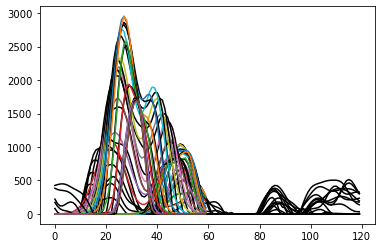

In [85]:
Model_Values = open("Secondary_Southern(DG)_Model_Values.txt", "w")

Model_Values.write("y_cut\tfit_pk\tfit_x\tfit_s\tfit_pk_e\tfit_x_e\tfit_s_e\tx_c\tpk_c\n")

offset_x1 = 240
offset_x2 = 360

first = 0

for ycut in ycut_list:
    cut = im_rot[ycut[0]:ycut[1],offset_x1:offset_x2]
    avg_cut = np.mean(cut,axis=0)
    avg_cut[avg_cut<0]=0 #doesn't change original image
    xdata=np.arange(0,60)
    idata=avg_cut[0:60]
    
    
    if (first < 1): #giving it intial first guess
        p0 = (np.max(idata),xdata[np.argmax(idata)],5,np.max(idata),xdata[np.argmax(idata)]+32,5)
        first =1
    else:
        p0 = p_opt #telling it to look where it was before

    p_opt,p_cov = curve_fit(Double_Gauss,xdata,idata,p0,maxfev=90000)
    
    plt.plot(range(120),avg_cut,c='k')
    plt.plot(xdata,Double_Gauss(xdata,p_opt[0],p_opt[1],p_opt[2],p_opt[3],p_opt[4],p_opt[5]))
    
    Err =np.sqrt(np.diag(p_cov))
    Model_Values.write("%f\t" % np.mean(ycut))
    Model_Values.write("%f\t%f\t%f\t%f\t%f\t%f\t" % (p_opt[0],p_opt[1] + offset_x1,p_opt[2],p_opt[3],p_opt[4] + offset_x1,p_opt[5]))
    Model_Values.write("%f\t%f\t%f\t" % (Err[0],Err[1],Err[2]))
    Model_Values.write("%f\t%f\t" % (xdata[idata==np.max(idata)],xdata[np.argmax(idata)]+offset_x1))
    Model_Values.write("%f\t" % np.max(idata))
    Model_Values.write("\n")
    
Model_Values.close()

## Plotting Linear Fit of Right Hand Double Gaussian

In [86]:
ycut_right, xfit_right = np.genfromtxt("Secondary_Southern(DG)_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,2])
ycut_left, xfit_left = np.genfromtxt("Secondary_Southern(DG)_Model_Values.txt", skip_header = 2, unpack=True, usecols=[0,5])

print(ycut_right)
print(ycut_left)


print(xfit_right)
print(xfit_left)

[382.5 377.5 372.5 367.5 362.5 357.5 352.5 347.5 342.5 337.5 332.5 327.5
 322.5 317.5 312.5 307.5 302.5 297.5 292.5 287.5 282.5 277.5 272.5 267.5
 262.5]
[382.5 377.5 372.5 367.5 362.5 357.5 352.5 347.5 342.5 337.5 332.5 327.5
 322.5 317.5 312.5 307.5 302.5 297.5 292.5 287.5 282.5 277.5 272.5 267.5
 262.5]
[295.297708 294.861883 292.7686   290.792087 290.624177 291.870302
 292.767857 293.681054 294.220148 293.292171 292.737248 291.772651
 286.2374   285.641804 285.06732  283.64364  281.501538 279.932994
 278.697326 277.594816 276.713375 274.776551 273.279003 273.486761
 273.641172]
[282.86143  286.422245 286.734343 284.904179 285.25169  286.806713
 287.844307 288.334585 287.872835 286.495252 285.935994 285.380831
 261.630908 263.433299 264.532037 264.797594 264.984631 265.424609
 266.123969 266.791179 267.133599 267.347581 267.625166 269.109147
 270.194734]


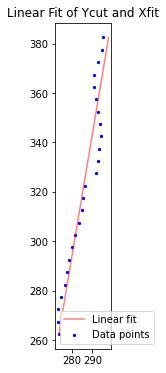

0.19995532430769267


In [87]:
fit = np.polyfit(ycut_right, xfit_right,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*ycut_right + intercept

fig = plt.figure(figsize=[1,6])
ax = fig.subplots()

ax.plot(fit_eq,ycut_right,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_right, ycut_right,s = 5, color = 'b', label = 'Data points') #Original data points

ax.set_title('Linear Fit of Ycut and Xfit')
ax.legend()
plt.show()

print(ang_coeff)

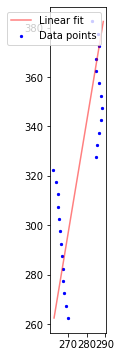

In [88]:
fit2 = np.polyfit(ycut_left, xfit_left,1)
ang_coeff2 = fit2[0]
intercept2 = fit2[1]
fit_eq2 = ang_coeff2*ycut_left + intercept2


fig = plt.figure(figsize=[1,6])
ax = fig.subplots()

ax.plot(fit_eq2,ycut_left,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(xfit_left, ycut_left,s = 5, color = 'b', label = 'Data points') #Original data points


ax.legend()
plt.show()

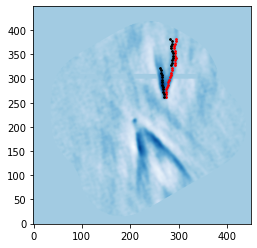

In [83]:
plt.imshow(im_rot,cmap='Blues',origin='lower')
plt.scatter(xfit_right,ycut_right, s=3, c='r')
plt.scatter(xfit_left,ycut_left, s=3, c='k')


# ax.plot(ycut_right, fit_eq2,color = 'r', alpha = 0.5, label = 'Linear fit')

